In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [4]:
path_original = "../../../data/artifical_signals/artifical_2_signals_errors.csv"
df_original = pd.read_csv(path_original)

In [5]:
subset = df_original.iloc[10000:,:]

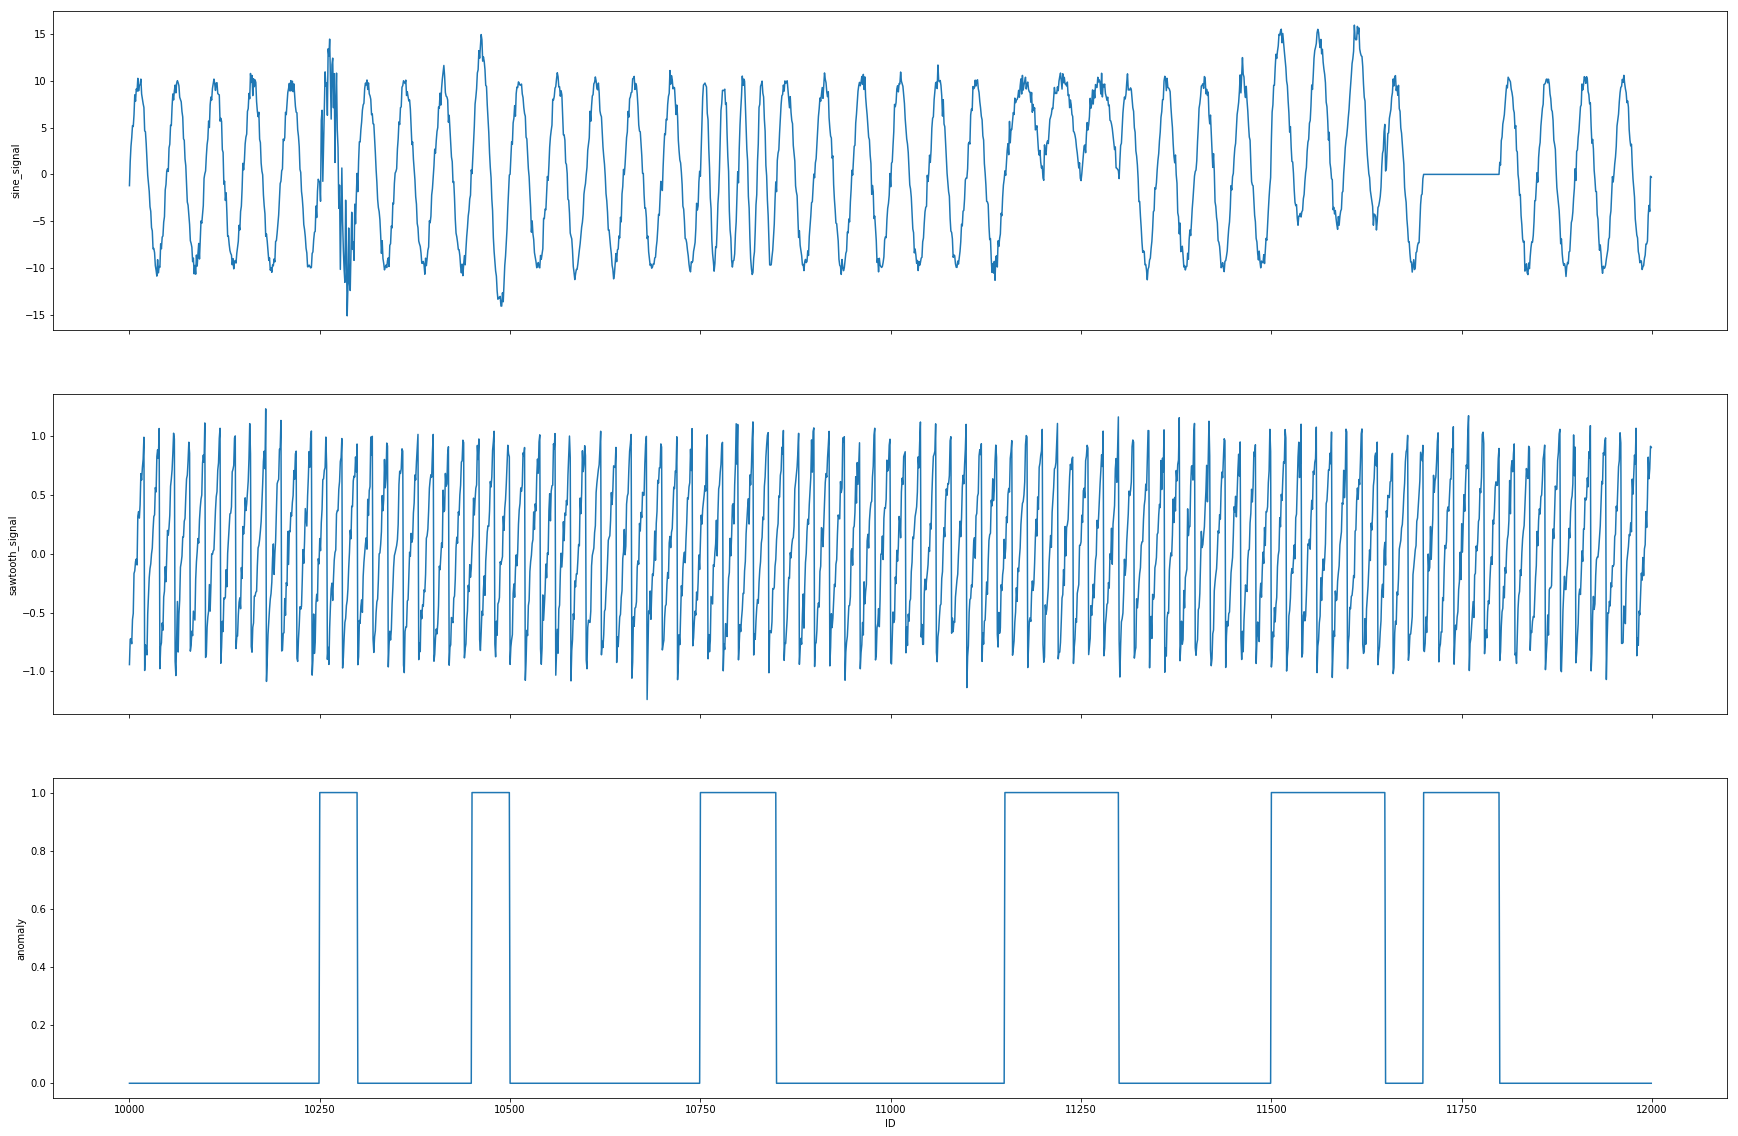

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
sns.lineplot(x=subset["ID"], y=subset.iloc[:,1], ax=ax[0])
sns.lineplot(x=subset["ID"], y=subset.iloc[:,2], ax=ax[1])
sns.lineplot(x=subset["ID"], y=subset.iloc[:,3], ax=ax[2])
#plt.savefig("../graphs/raw_sensor_data.png")
#ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
#fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()